In [119]:
import pandas as pd

occup = pd.read_csv('Occupancy_Estimation.csv')
occup.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [120]:
occup.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [121]:
num_of_entries_without_occupants = occup['Room_Occupancy_Count'].where(lambda x: x == 0).count()
num_of_entries_with_occupants = len(occup) - num_of_entries_without_occupants

print(f'Number of rows with 0 occupants: {num_of_entries_without_occupants}')
print(f'Number of rows with 1+ occupants: {num_of_entries_with_occupants}')

# ~80% of our entries are 0s
# we do not care about those entries because they are sensor data from non work hours

Number of rows with 0 occupants: 8228
Number of rows with 1+ occupants: 1901


In [122]:
x = occup[occup['Room_Occupancy_Count'] != 0][['Time', 'Room_Occupancy_Count']]
y = occup[occup['Room_Occupancy_Count'] != 0]['Time']
print(y.apply(type)) # time was not read as a time type

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
8373    <class 'str'>
8374    <class 'str'>
8375    <class 'str'>
8376    <class 'str'>
8377    <class 'str'>
Name: Time, Length: 1901, dtype: object


In [123]:
# we filter out the zero values, as they are non-relevant? for 
occup_non_zero = occup[occup['Room_Occupancy_Count'] != 0]
len(occup_non_zero)

1901

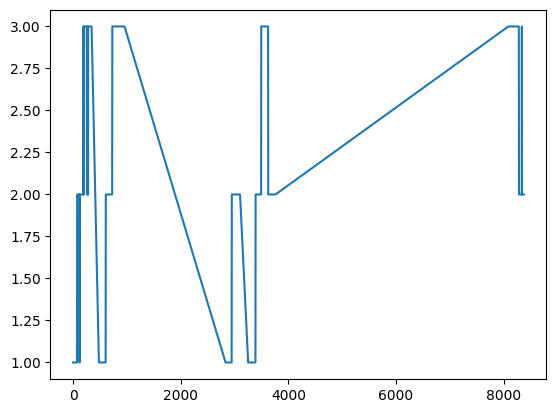

In [124]:
import matplotlib.pyplot as plt

occup_non_zero_num_people = occup_non_zero['Room_Occupancy_Count']
plt.plot(occup_non_zero_num_people)

## Exploring the Data

In [125]:
occup_df = occup_non_zero.copy()

In [126]:
occup_df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

array([[<AxesSubplot:xlabel='S1_Temp', ylabel='S1_Temp'>,
        <AxesSubplot:xlabel='S1_Light', ylabel='S1_Temp'>,
        <AxesSubplot:xlabel='S1_Sound', ylabel='S1_Temp'>,
        <AxesSubplot:xlabel='S5_CO2_Slope', ylabel='S1_Temp'>,
        <AxesSubplot:xlabel='S6_PIR', ylabel='S1_Temp'>,
        <AxesSubplot:xlabel='Room_Occupancy_Count', ylabel='S1_Temp'>],
       [<AxesSubplot:xlabel='S1_Temp', ylabel='S1_Light'>,
        <AxesSubplot:xlabel='S1_Light', ylabel='S1_Light'>,
        <AxesSubplot:xlabel='S1_Sound', ylabel='S1_Light'>,
        <AxesSubplot:xlabel='S5_CO2_Slope', ylabel='S1_Light'>,
        <AxesSubplot:xlabel='S6_PIR', ylabel='S1_Light'>,
        <AxesSubplot:xlabel='Room_Occupancy_Count', ylabel='S1_Light'>],
       [<AxesSubplot:xlabel='S1_Temp', ylabel='S1_Sound'>,
        <AxesSubplot:xlabel='S1_Light', ylabel='S1_Sound'>,
        <AxesSubplot:xlabel='S1_Sound', ylabel='S1_Sound'>,
        <AxesSubplot:xlabel='S5_CO2_Slope', ylabel='S1_Sound'>,
        <AxesSu

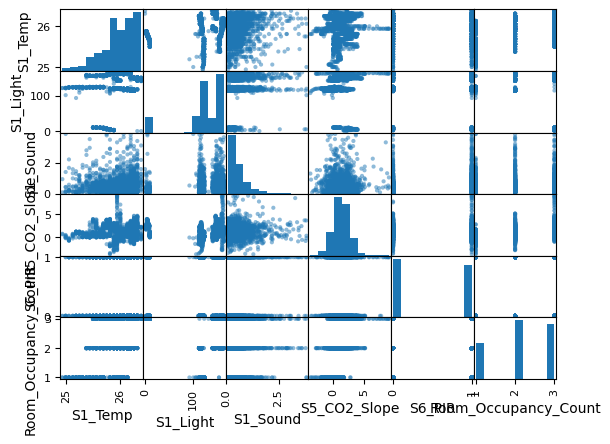

In [127]:
from pandas.plotting import scatter_matrix

attributes = ['S1_Temp', 'S1_Light', 'S1_Sound', 'S5_CO2_Slope', 'S6_PIR', 'Room_Occupancy_Count']
scatter_matrix(occup_df[attributes])

?
- `S6_PIR` does not correlate to any other attribute
- `S1_Light` does not correlate that much either. Plus light would still be on matter how many people are in the room itself
- For now we assume that `S1_Temp` does correlate with the `S6_PIR`
- Other features seem like enough to infer the amount of people present

In [128]:
occup_df[attributes].corr()

,S1_Temp,S1_Light,S1_Sound,S5_CO2_Slope,S6_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.248925,0.028741,0.148848,-0.054255,0.400324
S1_Light,0.248925,1.000000,0.154818,-0.019601,0.051946,-0.091208
S1_Sound,0.028741,0.154818,1.000000,0.025105,0.216386,0.059931
S5_CO2_Slope,0.148848,-0.019601,0.025105,1.000000,0.065634,0.492001
S6_PIR,-0.054255,0.051946,0.216386,0.065634,1.000000,0.148876
Room_Occupancy_Count,0.400324,-0.091208,0.059931,0.492001,0.148876,1.000000


In [129]:
chosen_attributes = ['S1_Temp', 'S1_Sound', 'S5_CO2_Slope', 'Room_Occupancy_Count']
chosen_attributes_no_temp = ['S1_Sound', 'S5_CO2_Slope', 'Room_Occupancy_Count']

## Preparing the Data

In [130]:
# there are no NaNs in our data. No need to impute values
occup_df[chosen_attributes].count()

S1_Temp                 1901
S1_Sound                1901
S5_CO2_Slope            1901
Room_Occupancy_Count    1901
dtype: int64

In [131]:
occup_final = occup_df[chosen_attributes]

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
occup_scaled = scaler.fit_transform(occup_final)
occup_scaled

array([[-3.45950591, -0.8531829 , -0.37258989, -1.46129127],
       [-3.45950591,  0.64743274, -0.4577517 , -1.46129127],
       [-3.25664584, -0.23528234, -0.54557481, -1.46129127],
       ...,
       [ 0.1243554 , -0.41182536, -0.79839891, -0.16076941],
       [-0.07850468,  0.36496392, -0.64670445, -0.16076941],
       [ 0.1243554 ,  2.35990001, -0.53226827, -0.16076941]])

In [133]:
pd.DataFrame(occup_scaled).describe()

,0,1,2,3
count,1.901000e+03,1.901000e+03,1.901000e+03,1.901000e+03
mean,6.010272e-15,2.990185e-17,-1.868866e-16,-9.718102e-17
std,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00
min,-3.459506e+00,-8.884915e-01,-3.419786e+00,-1.461291e+00
25%,-5.180348e-01,-7.296028e-01,-6.892853e-01,-1.607694e-01
50%,3.272155e-01,-2.529366e-01,-2.662006e-02,-1.607694e-01
75%,7.667456e-01,3.296553e-01,6.041095e-01,1.139752e+00
max,1.409136e+00,5.784835e+00,5.309299e+00,1.139752e+00


In [134]:
import numpy as np

# column of index 3 is the target attribute, others are features
X = occup_scaled[:, 0:3] # wizards were here
y = occup_scaled[:, 3]
X, y

(array([[-3.45950591, -0.8531829 , -0.37258989],
        [-3.45950591,  0.64743274, -0.4577517 ],
        [-3.25664584, -0.23528234, -0.54557481],
        ...,
        [ 0.1243554 , -0.41182536, -0.79839891],
        [-0.07850468,  0.36496392, -0.64670445],
        [ 0.1243554 ,  2.35990001, -0.53226827]]),
 array([-1.46129127, -1.46129127, -1.46129127, ..., -0.16076941,
        -0.16076941, -0.16076941]))

## Train - Test

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=True
)

In [136]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [137]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    lin_reg,
    X_test,
    y_test,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

scores.mean(), scores.std()

(-0.797426229421865, 0.031302513434558164)

In [138]:
lin_reg.coef_, lin_reg.intercept_

(array([0.32792312, 0.0370742 , 0.4530028 ]), 0.011086327413618851)

(numpy.ndarray, (476,))

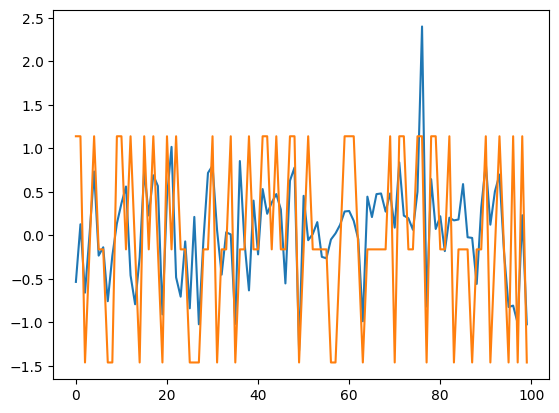

In [139]:
x = lin_reg.predict(X_test)
plt.plot(x[:100])
plt.plot(y_test[:100])

type(x), x.shape

In [ ]:
x_scaled_back = scaler.inverse_transform(x)
test_scaled_back = scaler.inverse_transform(y_test)

# plt.plot(x_scaled_back)
# plt.plot(test_scaled_back)